<img src="ml2_group_assignment.png" width="800"/>

# <font color=green> Introduction </font>

The assignment is focused on solving the Forest Cover Type Prediction: https://www.kaggle.com/c/forest-cover-type-prediction/overview. This task proposes a classification problem: predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. 

**You must predict the Cover_Type for every row in the test set (565892 observations).**

<img src="tree_types.png" width="800"/>

# <font color=green> Table of contents </font>

* Data Analysis
* Exploratory Data Analysis
* Feature Engineering & Selection
* Compare Several Machine Learning Models
* Perform Hyperparameter Tuning on the Best Model
* Interpret Model Results
* Evaluate the Best Model with Test Data (replying the initiating question)
* Summary & Conclusions

# Sections 
* [Libaries used](#0)
* [1. Import Data](#1)
* [2. Data analysis](#2)  
  * [2.1.Explanation of variables](#2.1)
      * [1.2.1 XX](#2.1.1)
* [3. Exploratory Data Analysis](#3)
  * [3.1 Analysis of the Dataset using EDA](#3.1)
  * [3.2 D'Agostino and Pearson's Test](#3.2)  
  * [3.3 Checking Variable Completeness ](#3.3)
  * [3.4 Correlation Matrix ](#3.4)  
  * [3.5 Paired density, scatterplot matrix and 3D Graphics ](#3.5)   
  * [3.6 Categorial EDA ](#3.6) 
      * [3.6.1 Categorial Bar Diagrams](#3.6.1)  
      * [3.6.2.Violinplot with Dependent Variable](#3.6.2)  
      * [3.6.3.Treemap for categorial Data](#3.6.3) 
* [4. Baseline Model](#4)
  * [4.0 Prepare Data and Standardization](#4.0)
  * [4.1 Random Forest](#4.1) 
  * [4.2 Gradient Boosting](#4.2)  
  * [4.3 Decision Trees](#4.3)
  * [4.4 K-Nearest Neighbors (KNN)](#4.4)  
  * [4.5 Logistic Regression](#4.5) 
  * [4.6 Naive Bayes](#4.6) 


<img src="roosevelt-national-forest.jpeg" width=1200 height=800 align="center">

<a id='0'></a>
# <font color=green> Libraries used </font>

In [11]:
!pip install squarify

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns  # Graphing
import matplotlib.pyplot as plt
import squarify #treemap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from yellowbrick.classifier import ROCAUC
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id='0'></a>
##  <font color=green>0.Import the Data </font>
Let’s load the training data and create data frame

In [13]:
data_train = pd.read_csv("train.csv")
data_train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [14]:
data_train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

Let's keep the original dataset for later comparisons and make a copy for the FE process

In [15]:
df_original = data_train.copy()

In [16]:
data_train.tail()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
15115            0            0            0           3  
15116            0            0            0           3  
15117            0            0            0           3  
15118            0            0            0           3  
15119            0            0            0           3  

[5 rows x 56 columns]

In [17]:
data_test = pd.read_csv("test.csv")
data_test.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type31  \
0            196             214            156  ...            0   
1            201             216            152  ...            0   
2            206             208            137  ...            0   
3            208             201            125  ...            0   
4            210             195            115  ...            0   

   Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0            0  
1            0            0            0            0  
2            0            0            0            0  
3            0            0            0            0  
4            0            0            0            0  

[5 rows x 55 columns]

<a id='5.1'></a>
## <font color=green>  5.Feature Engineering<font>

<a id='5.1'></a>
### <font color=darkcyan> 5.1 Check for Anomalies and Outliers <font>

Since the z-score is sensitive to the  mean and standard deviation and its assumption of a normally distributed variable, we cannot use the z-score for outlier handling because of the skewed data. The disadvantage using percentile it considers always and outlier of the lowest or highest value, even there are no outliers. As the number of observations increases, so does the number of observations considered outliers; After all, using a percentile based method will always flat-out reject a certain percentage of our observations.Thus, we need to use the percentile with care. 

<a id='5.1.1'></a>
### <font color=darkcyan> 5.1.1 Outlier Detection Treatment using Inter-Quartile Range rule Function <font>

The IQR is the difference between the 75th and 25th percentile. The IQR is more resistant to outliers. The IQR by definition only covers the middle 50% of the data, so outliers are well outside this range and the presence of a small number of outliers is not likely to change this significantly. If you add an outlier, the IQR will change to another set of data points that are probably not that dissimilar to the previous ones (in most datasets), hence it is “resistant” to change. This is especially the case of a large dataset.

Now we are testing different ranges for IQR, namely 2,3 and 4 to check for more extreme outlier values. 

In [18]:
def outlier_function(df, col_name,value_IQR):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(value_IQR*IQR)
    lower_limit = first_quartile-(value_IQR*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

<a id='5.1.2'></a>
### <font color=darkcyan> 5.1.2 Inter-Quartile Range rule: 4 IQR from Median <font>

In [19]:
# loop through all columns to see if there are any outliers, for all values which are not only 0 and 1
for column in ["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]:
    if outlier_function(data_train, column,4)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(data_train, column,4)[2], column))

There are 13 outliers in Vertical_Distance_To_Hydrology
There are 1 outliers in Hillshade_9am


There is 1 record of Hillshade_9am with a zero value, which is a valid value as Hillshade can be zero. This is because there are parts in the mountain that never see the sunlight (blind spots). Hence we keep the value as it is. 

In [20]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Vertical_Distance_To_Hydrology'], 25), percentile(data_train['Vertical_Distance_To_Hydrology'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 4
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_vd_h = data_train[(data_train['Vertical_Distance_To_Hydrology'] > lower) & (data_train['Vertical_Distance_To_Hydrology'] < upper)]

Check if the model improves after removing vertical distance to hydrology 

In [21]:
X4=data_train_vd_h.drop(labels=['Id','Cover_Type'],axis=1)
y4=data_train_vd_h['Cover_Type']

In [22]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X4[scale_numerical]=scaler.fit_transform(X4[scale_numerical])

In [23]:
y4.value_counts()

5    2160
3    2160
6    2160
4    2160
1    2159
2    2157
7    2151
Name: Cover_Type, dtype: int64

In [24]:
X4_train,X4_val,y4_train,y4_val = train_test_split(X4,y4,random_state=37) #seed is 18!Cannot use stratify because the datset is unbalanced

In [25]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X4_train,y4_train)

Comparing the previous score with the new score after removing the outliers of vertical distance to Hydrology: previous __forest.score: 0.83968__

It improves slightly, hence removing these outliers turns to be the selected approach

In [26]:
# calculating accuracy_score
forest.score(X4_val,y4_val)

0.854381784485041

#### <font color=darkcyan> Replacing with Median <font>
Since removing outliers improved performance of our model, using median values to keep a balanced sample set seems to be a reasonable approach. Otherwise the data becomes unbalanced, for which, other tools have to be used

In [27]:
med = np.median(data_train['Vertical_Distance_To_Hydrology'])
for i in data_train['Vertical_Distance_To_Hydrology']:
    if i > upper or i < lower:
            data_train['Vertical_Distance_To_Hydrology_n'] = data_train['Vertical_Distance_To_Hydrology'].replace(i, med)

In [28]:
Xmed=data_train.drop(labels=['Id','Cover_Type','Vertical_Distance_To_Hydrology'],axis=1)
ymed=data_train['Cover_Type']

In [29]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology_n',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
Xmed[scale_numerical]=scaler.fit_transform(Xmed[scale_numerical])

In [30]:
ymed.value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

In [31]:
Xmed_train,Xmed_val,ymed_train,ymed_val = train_test_split(X4,y4,random_state=37) #seed is 18!Cannot use stratify because the datset is unbalanced

In [32]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(Xmed_train,ymed_train)

In [33]:
# calculating accuracy_score
forest.score(Xmed_val,ymed_val)

0.8464389727296796

Once again, model improves slightly, hence proving right the hypothesis of imputing with median values so to obtain a more balanced dataset

<a id='5.1.3'></a>
### <font color=darkcyan> 5.1.2 Inter-Quartile Range rule: 3 IQR from Median <font>

In [34]:
# loop through all columns to see if there are any outliers, for all values which are not only 0
# and 1
for column in ["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]:
    if outlier_function(data_train, column,3)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(data_train, column,3)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points


In [35]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Horizontal_Distance_To_Hydrology'], 25), percentile(data_train['Horizontal_Distance_To_Hydrology'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_hd_h3 = data_train[(data_train['Horizontal_Distance_To_Hydrology'] > lower) & (data_train['Horizontal_Distance_To_Hydrology'] < upper)]

In [36]:
X3_hd=data_train_hd_h3.drop(labels=['Cover_Type'],axis=1)
y3_hd=data_train_hd_h3['Cover_Type']

In [37]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3_hd[scale_numerical]=scaler.fit_transform(X3_hd[scale_numerical])

In [38]:
X_train_hd,X_val_hd,y_train_hd,y_val_hd = train_test_split (X3_hd,y3_hd,random_state=37) #seed is 18!

In [39]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train_hd,y_train_hd)

In [40]:
forest.score(X_val_hd,y_val_hd)

0.8494823466949828


#### <font color=darkcyan> Vertical Distance To Hydrology <font>

In [41]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Vertical_Distance_To_Hydrology'], 25), percentile(data_train['Vertical_Distance_To_Hydrology'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_vd_h3 = data_train[(data_train['Vertical_Distance_To_Hydrology'] > lower) & (data_train['Vertical_Distance_To_Hydrology'] < upper)]

In [42]:
X3=data_train_vd_h3.drop(labels=['Cover_Type'],axis=1)
y3=data_train_vd_h3['Cover_Type']

In [43]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3[scale_numerical]=scaler.fit_transform(X3[scale_numerical])

In [44]:
X_train,X_val,y_train,y_val = train_test_split (X3,y3,random_state=37) #seed is 18!

In [45]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train,y_train)

The improvement from previous removal of outliers of Vertical Distance to Hydrology is not so incremental anymore in addition we would remove several points in the dataset, we will disregard this option of the 49 datapoints 

In [46]:
# calculating accuracy_score
forest.score(X_val,y_val)

0.8593418259023354

In [47]:
X_train.shape

(11301, 56)

#### <font color=darkcyan> Horizontal Distance To Roadways <font>
Taking out the outliers of roadways does not improve the model it actually gets worse.

In [48]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Horizontal_Distance_To_Roadways'], 25), percentile(data_train['Horizontal_Distance_To_Roadways'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_rw = data_train[(data_train['Horizontal_Distance_To_Roadways'] > lower) & (data_train['Horizontal_Distance_To_Roadways'] < upper)]

In [49]:
X3_rw=data_train_rw.drop(labels=['Cover_Type'],axis=1)
y3_rw=data_train_rw['Cover_Type']

In [50]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3_rw[scale_numerical]=scaler.fit_transform(X3_rw[scale_numerical])

In [51]:
X_train,X_val,y_train,y_val = train_test_split (X3_rw,y3_rw,random_state=37) #seed is 18!

In [52]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train,y_train)

In [53]:
# calculating accuracy_score
forest.score(X_val,y_val)

0.8539682539682539

#### <font color=darkcyan> Horizontal Distance To Fire Points <font>
Taking out the outliers it does not improve the model either 

In [54]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Horizontal_Distance_To_Fire_Points'], 25), percentile(data_train['Horizontal_Distance_To_Fire_Points'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_fp = data_train[(data_train['Horizontal_Distance_To_Fire_Points'] > lower) & (data_train['Horizontal_Distance_To_Fire_Points'] < upper)]

In [55]:
X3_fp=data_train_fp.drop(labels=['Cover_Type'],axis=1)
y3_fp=data_train_fp['Cover_Type']

In [56]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3_fp[scale_numerical]=scaler.fit_transform(X3_fp[scale_numerical])

In [57]:
X_train,X_val,y_train,y_val = train_test_split (X3_fp,y3_fp,random_state=37) #seed is 18

In [58]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train,y_train)

In [59]:
# calculating accuracy_score
forest.score(X_val,y_val)

0.8521483853749666

In [60]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=data_train[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.4)

In [61]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=data_train[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.4)

In [62]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['Hillshade_9am', 'Hillshade_Noon']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=data_train[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.4)

<a id='5.2'></a>
## <font color=green> 5.2 Feature Transformation and Building of new features <font>

<a id='5.2.1'></a>
### <font color=green> 5.2.1 ID <font>


In [ ]:
#We agree for the test to not remove ID because the ID is the unique indentifier to evaluate
data_train.drop('Id',axis = 1, inplace = True)

### <font color=green> 5.2.2 Bivariate Combinations <font>

During feature engineering, we want to try to create a wide variety of interactions between multiple variables in order to create new variables. By manipulating them together, we create opportunities to have new and impactful features which could potentially impact our target variable, thus engineering our features. For this argument, we will create as many bivariate combinations of our predicting variables using the ‘combinations’ method from itertools library.It is also recommeneded to not make interactions with the dummy variables as these are either 0 or 1 and we will not get any additional information from making the interaction this way. Further, it is not recommended to use standardization before bivariate combinations as we want to increase the signal. <br>
Source: https://towardsdatascience.com/feature-engineering-combination-polynomial-features-3caa4c77a755 <br>
https://samchaaa.medium.com/preprocessing-why-you-should-generate-polynomial-features-first-before-standardizing-892b4326a91d

In order to use the bivariate combination we split the dataset for using it.Note this is not the split we will use later for testing the algorithm. This has only the purpose of testing all the combination and selecting the best once. 

In [ ]:
# Identify and drop our target variable 'Cover_Type' from dataframe, 
# isolating our independent variables
X = data_train.drop('Cover_Type', axis = 1)

# Isolate our dependent variable as a feature
y = data_train['Cover_Type']

In [ ]:
# Train Test Split (70/30 size), drop duplicates and missing values

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .3, random_state=42, stratify=y)

X_train.drop_duplicates(inplace = True)
X_train.dropna(inplace = True)

In [ ]:
# Create every possible bivariate combination to be tested for feature engineering
from itertools import combinations

column_list = X_train.columns
filtered_column_list = [column for column in column_list if 'Soil_Type' not in column and 'Wilderness_Area' not in column ] 
interactions = list(combinations(filtered_column_list, 2))
interactions

With these combinations, it would be incredibly tedious and time consuming to test individually every single combination. Instead, we will add each combination to a dictionary, and then index the respective dictionary items as arguments in an iterative __random forest regression__ and __logistic Regression__ and will select the top 5 best interaction variables. We only use for simplicity two algorithm and not all.

In [ ]:
#Outcome based on the best Random Forest Score 
from sklearn.ensemble import RandomForestClassifier
interaction_dict = {}
i = 1
for interaction in interactions:
    print(f'Going through interaction {i}')
    i += 1
    X_train_int = X_train
    X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
    fr3 = RandomForestClassifier(n_estimators=20)
    fr3.fit(X_train,y_train)
    interaction_dict[fr3.score(X_train_int, y_train)] = interaction

Add the top  interaction features (which exclude a categorical variable) to existing DF for feature engineered model

In [ ]:
for (key, value) in interactions:
    data_train[key + '_multi_' + value] = data_train[key] * data_train[value]
    data_train[key + '_add_' + value] = data_train[key] + data_train[value]
    data_train[key + '_divide_' + value] = data_train[key] / data_train[value]

In [ ]:
data_train.describe()

In [ ]:
pip install pycaret

In [ ]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'Cover_Type', polynomial_features = True,silent=True) 

from sklearn.ensemble import RandomForestClassifier
interaction_dict = {}
i = 1
for interaction in interactions:
    print(f'Going through interaction {i}')
    i += 1
    X_train_int = X_train
    X_train_int['int'] = X_train_int[interaction[0]] + X_train_int[interaction[1]]
    fr3 = RandomForestClassifier(n_estimators=20)
    fr3.fit(X_train,y_train)
    interaction_dict[fr3.score(X_train_int, y_train)] = interaction

top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

### <font color=green> 5.2.3 Polynomial Features <font>
    
We have just seen how to make two variables interact together,but sometimes the relationship between dependent and independent variables are more complex and not linear. Polynomials is another way to create new features! A very strong (usually) option for new features is increasing the power of a single variable. For our purposes, we will try and see if all the existing variables, can improve our Baseline by being increased in power.<br>
Source: https://towardsdatascience.com/feature-engineering-combination-polynomial-features-3caa4c77a755

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_dict = {}
for feature in X_train_int.columns:
    for p in range(2, 5):
        X_train_poly = X_train_int
        X_train_poly['sq'] = X_train_poly[feature] ** p
        fr3 = RandomForestClassifier(n_estimators=20)
        fr3.fit(X_train_poly, y_train)
        poly_dict[fr3.score(X_train_poly, y_train)] = [feature, p]
    
poly_dict[max(poly_dict.keys())]

In [ ]:
top_5 = sorted(poly_dict.keys(), reverse = True)[:5]
for feature in top_5:
    print(poly_dict[feature])

<a id='5.2.2'></a>
### <font color=green> 5.2.2 Distance To Hydrology <font>
#### <font color=green> New Features <font>

We combine Vertical distance to Hydrology and Horizontal distance to Hydrology since these two are highly correlated and also we can transform it into one variable which would give the distance to the closest water surface and using Pythagoras 
theorem for Distance calculation, since we have the horizontal and the vertical Distance. 
Source : https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9

In [63]:
data_train['Distance_To_Hydrology'] = data_train['Horizontal_Distance_To_Hydrology']**2 +data_train['Vertical_Distance_To_Hydrology']**2
data_train['Distance_To_Hydrology'] = data_train['Distance_To_Hydrology']**0.5
data_train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type34  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type40  Cover_Type  Vertical_Distance_To_Hydrology_n  \
0            0           5                                 0   
1            0           5                                -6   
2            0           2                                65   
3            0           2                               118   
4            0           5                                -1   

   Distance_To_Hydrology  
0             258.000000  
1             212.084889  
2             275.769832  
3             269.235956  
4             153.003268  

[5 rows x 58 columns]

#### <font color=green> Square root and logarithm Transformation  <font>

Now we are checking the distribution of the new created variable if further transformation is needed. The Distance to Hydrology is still positive skewed and has zero values. In order to use log we will use log + 1 in order to use logarithm with zero values. 

Source: https://www.youtube.com/watch?v=_c3dVTRIK9c and 

Source_2: https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9

As a rule of thump, the skewness can be interpreted as follows:
<img src="Skew.png" width=400 height=200 align="center">

Source: https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

In [64]:
print('\033[95m'+"Skew before transformation\n", data_train['Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['Distance_To_Hydrology'].max(),)

Skew before transformation
 1.4420723247653018 
min
 0.0 
max
 1356.9395712411072


In [65]:
#Using the log10+ 1 logarithm 
data_train['log10_Distance_To_Hydrology'] = np.log10(data_train['Distance_To_Hydrology']+1)

In [66]:
#Using the square root 
data_train['sqr_Distance_To_Hydrology'] = data_train['Distance_To_Hydrology']**0.5

#### <font color=green> Results after logarithm and <font color=darkcyan> Sqrare root Transformation<font>

In [67]:
print('\033[92m' +"Skew after Log transformation\n", data_train['log10_Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['log10_Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['log10_Distance_To_Hydrology'].max(),)

Skew after Log transformation
 -1.6236384008076947 
min
 0.0 
max
 3.1328804441267675


In [68]:
print('\033[96m'+ "Skew after Square Root Transformation\n", data_train['sqr_Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['sqr_Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['sqr_Distance_To_Hydrology'].max(),)

Skew after Square Root Transformation
 0.0351310310927601 
min
 0.0 
max
 36.836660696120475


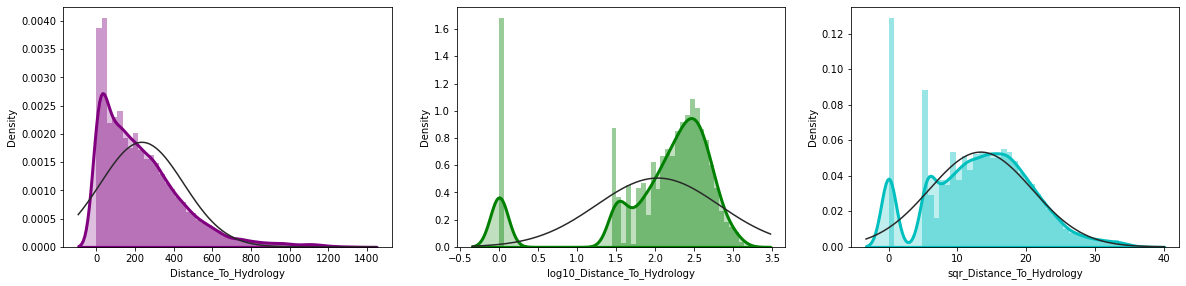

In [69]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,15))
f.add_subplot(331)
histPlot(data_train['Distance_To_Hydrology'], 'purple')
f.add_subplot(332)
histPlot(data_train['log10_Distance_To_Hydrology'], 'green')
f.add_subplot(333)
histPlot(data_train['sqr_Distance_To_Hydrology'], 'c')

As you can see above, for distance to Hydrology the __square root__ showed a better performance in terms of skewness and is closer to a normal bell shaped than the logarithm transformation. We will be using Square Root as a new feature in the dataset and will frop the others from the dataset.  

In [175]:
data_train.drop(['log10_Distance_To_Hydrology'], axis=1,inplace=True)

<a id='5.2.3'></a>
### <font color=green> 5.2.3 Horizontal Distance To Roadways <font>

#### <font color=green> Square root and logarithm Transformation  <font>

For log transformation there should be no zeros, negative values and the distribution should be positive skewed( bigger than 1 is positive) hence we are using the square root as you can see for logarithm transformation below the distribution did not improve!!!

In [71]:
print('\033[95m'+"Skew before Transformation\n", data_train['Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin before Transformation\n", data_train['Horizontal_Distance_To_Roadways'].min(),
      "\nmax before Transformation\n", data_train['Horizontal_Distance_To_Roadways'].max(),)

Skew before Transformation
 1.247810678465482 
min before Transformation
 0 
max before Transformation
 6890


#### <font color=green> Results after logarithm and <font color=darkcyan> Sqrare root Transformation<font>

In [72]:
# since we have null values we add plus 1 to avoid log of zero.We are using natural log and log10
data_train['Sqr_Horizontal_Distance_To_Roadways'] = data_train['Horizontal_Distance_To_Roadways']**0.5
data_train['log_Horizontal_Distance_To_Roadways'] = np.log(data_train['Horizontal_Distance_To_Roadways']+1)
data_train['log10_Horizontal_Distance_To_Roadways'] = np.log10(data_train['Horizontal_Distance_To_Roadways']+1)

In [73]:
print('\033[96m'+ "Skew after Square Root Transformation\n", data_train['Sqr_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin \n", data_train['Sqr_Horizontal_Distance_To_Roadways'].min(),
      "\nmax \n", data_train['Sqr_Horizontal_Distance_To_Roadways'].max(),)


Skew after Square Root Transformation
 0.47623044767204115 
min 
 0.0 
max 
 83.00602387778854


In [74]:
print('\033[92m' +"Skew after log Transformation\n", data_train['log_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin\n", data_train['log_Horizontal_Distance_To_Roadways'].min(),
      "\nmax\n", data_train['log_Horizontal_Distance_To_Roadways'].max(),)

Skew after log Transformation
 -0.6892190307043193 
min
 0.0 
max
 8.837971491357209


In [75]:
print('\033[92m'+ "Skew after log10 transformation\n", data_train['log10_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin \n", data_train['log10_Horizontal_Distance_To_Roadways'].min(),
      "\nmax \n", data_train['log10_Horizontal_Distance_To_Roadways'].max(),)

Skew after log10 transformation
 -0.6892190307043152 
min 
 0.0 
max 
 3.8382822499146885


In [76]:
# testing if the sqaure root is normally distributed and it shows it is not, however it is less skewed than before
stats.normaltest(data_train['Sqr_Horizontal_Distance_To_Roadways'])

NormaltestResult(statistic=593.4024989110219, pvalue=1.3940700201238209e-129)

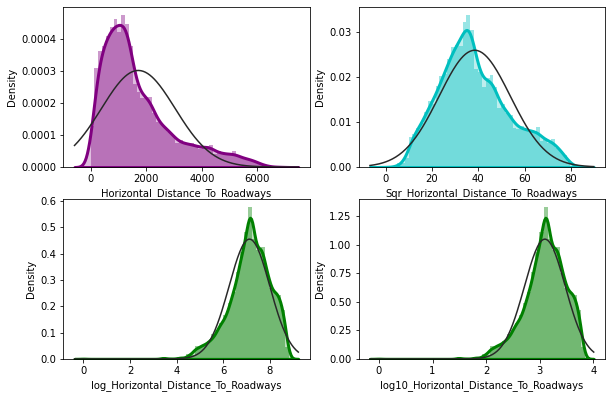

In [77]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(15,10))
f.add_subplot(331)
histPlot(data_train['Horizontal_Distance_To_Roadways'], 'purple')
f.add_subplot(334)
histPlot(data_train['log_Horizontal_Distance_To_Roadways'], 'green')
f.add_subplot(335)
histPlot(data_train['log10_Horizontal_Distance_To_Roadways'], 'green')
f.add_subplot(332)
histPlot(data_train['Sqr_Horizontal_Distance_To_Roadways'], 'c')

We achieved the best result for square root of the Horizontal Distance to Roadways. 

In [174]:
data_train.drop(['log_Horizontal_Distance_To_Roadways','log10_Horizontal_Distance_To_Roadways'], axis=1,inplace=True)

<a id='5.2.4'></a>
### <font color=green> 5.2.4 Slope <font>
#### <font color=green> Square root and logarithm Transformation  <font>

In [78]:
print('\033[95m'+ "Skew before transformation\n", data_train['Slope'].skew(), 
      "\nmin\n", data_train['Slope'].min(),
      "\nmax \n", data_train['Slope'].max(),)

Skew before transformation
 0.5236583382936286 
min
 0 
max 
 52


#### <font color=green> Results after logarithm and <font color=darkcyan> Sqrare root Transformation<font>

In [79]:
# since we have null values we add plus 1 to avoid log of zero
data_train['logSlope'] = np.log(data_train['Slope']+1)

In [80]:
print('\033[92m'+"Skew after log transformation\n", data_train['logSlope'].skew(), 
      "\nmin\n", data_train['logSlope'].min(),
      "\nmax\n", data_train['logSlope'].max(),)

Skew after log transformation
 -0.7530340055684758 
min
 0.0 
max
 3.970291913552122


In [81]:
data_train['SqrSlope'] = data_train['Slope']**0.5

In [82]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['SqrSlope'].skew(), 
      "\nmin\n", data_train['SqrSlope'].min(),
      "\nmax\n", data_train['SqrSlope'].max(),)

Skew after Square Root transformation
 -0.09875824995364099 
min
 0.0 
max
 7.211102550927978


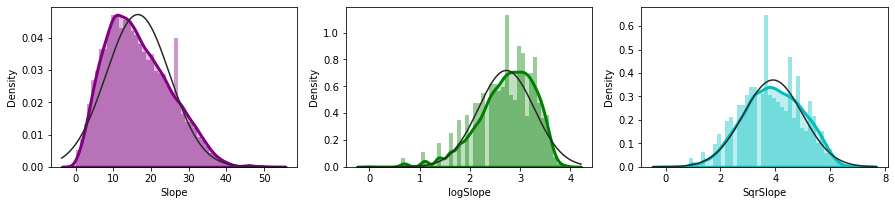

In [83]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(15,10))
f.add_subplot(331)
histPlot(data_train['Slope'], 'purple')
f.add_subplot(332)
histPlot(data_train['logSlope'], 'green')
f.add_subplot(333)
histPlot(data_train['SqrSlope'], 'c')

Since the skweness for the slope shows better performance when using the square root, we will transform the variable into square root as well. 

In [173]:
data_train.drop(['logSlope'], axis=1,inplace=True)

<a id='5.2.5'></a>
### <font color=green> 5.2.5 Horizontal Distance To Fire Points  <font>
#### <font color=green> Transformation  <font>

In [84]:
print('\033[95m'+"Skew before transformation\n", data_train['Horizontal_Distance_To_Fire_Points'].skew(), 
      "\nmin\n", data_train['Horizontal_Distance_To_Fire_Points'].min(),
      "\nmax\n", data_train['Horizontal_Distance_To_Fire_Points'].max(),)

Skew before transformation
 1.6170988738848289 
min
 0 
max
 6993


#### <font color=green> Results after logarithm and <font color=darkcyan> Sqrare root Transformation<font>

In [85]:
# since we have null values we add plus 1 to avoid log of zero
data_train['log_Horizontal_Distance_To_firepoints'] = np.log(data_train['Horizontal_Distance_To_Fire_Points']+1)

In [86]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Horizontal_Distance_To_firepoints'].skew(), 
      "\nmin\n", data_train['log_Horizontal_Distance_To_firepoints'].min(),
      "\nmax\n", data_train['log_Horizontal_Distance_To_firepoints'].max(),)

Skew after log transformation
 -0.6708653924261154 
min
 0.0 
max
 8.852807917623322


In [87]:
#Transform with square root
data_train['sqr_Horizontal_Distance_To_firepoints'] = data_train['Horizontal_Distance_To_Fire_Points']**0.5

In [88]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Horizontal_Distance_To_firepoints'].skew(), 
      "\nmin\n", data_train['sqr_Horizontal_Distance_To_firepoints'].min(),
      "\nmax\n", data_train['sqr_Horizontal_Distance_To_firepoints'].max(),)

Skew after Square Root transformation
 0.5839887898581113 
min
 0.0 
max
 83.62415918859813


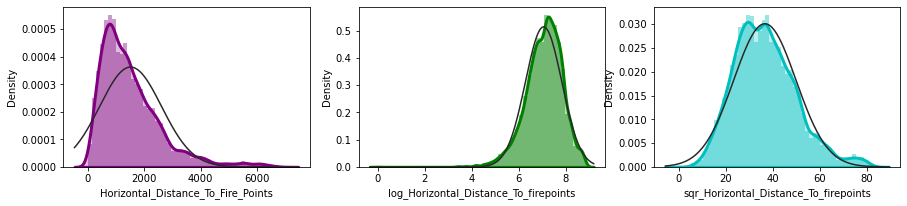

In [89]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(15,10))
f.add_subplot(331)
histPlot(data_train['Horizontal_Distance_To_Fire_Points'], 'purple')
f.add_subplot(332)
histPlot(data_train['log_Horizontal_Distance_To_firepoints'], 'green')
f.add_subplot(333)
histPlot(data_train['sqr_Horizontal_Distance_To_firepoints'], 'c')

Since square root transformation gives the best result in skewness, we will also use sqr for the feature variable.

In [172]:
data_train.drop(['log_Horizontal_Distance_To_firepoints'], axis=1,inplace=True)

<a id='5.2.6'></a>
### <font color=green> 5.2.6 Hillshades <font>
### <font color=green> 5.2.6.1 Mean Hillshade <font>
#### <font color=green> Creation of new Feature: Mean Hillshade <font>

In [90]:
# We take the average of Hillshades,which gives you the average light exposure of each cover type during the day
data_train['Mean_Hillshade'] = (data_train['Hillshade_9am']+data_train['Hillshade_Noon']+data_train['Hillshade_3pm'])/3

In [91]:
print('\033[95m'+"Skew before transformation\n", data_train['Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['Mean_Hillshade'].min(),
      "\nmax\n", data_train['Mean_Hillshade'].max(),)

Skew before transformation
 -1.0903510485555057 
min
 105.66666666666667 
max
 213.66666666666666


#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [92]:
data_train['log_Mean_Hillshade'] = np.log(data_train['Mean_Hillshade'])

In [93]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['log_Mean_Hillshade'].min(),
      "\nmax\n", data_train['log_Mean_Hillshade'].max(),)

Skew after log transformation
 -1.4322026123219795 
min
 4.660289485209171 
max
 5.36441716825256


In [94]:
data_train['log10Mean_Hillshade'] = np.log10(data_train['Mean_Hillshade'])

In [95]:
print('\033[92m'+"Skew after log10 transformation\n", data_train['log10Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['log10Mean_Hillshade'].min(),
      "\nmax\n", data_train['log10Mean_Hillshade'].max(),)

Skew after log10 transformation
 -1.4322026123219602 
min
 2.023938007498089 
max
 2.329736774799155


In [96]:
data_train['sqr_Mean_Hillshade'] = data_train['Mean_Hillshade']**0.5

In [97]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['sqr_Mean_Hillshade'].min(),
      "\nmax\n", data_train['sqr_Mean_Hillshade'].max(),)

Skew after Square Root transformation
 -1.25173398314383 
min
 10.279429296739517 
max
 14.617341299520465


In [98]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers
# transform training data with Boxcox
data_train['Mean_Hillshade_boxcox'], _ = stats.boxcox(data_train['Mean_Hillshade'])

In [99]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Mean_Hillshade_boxcox'].skew(), 
      "\nmin\n", data_train['Mean_Hillshade_boxcox'].min(),
      "\nmax\n", data_train['Mean_Hillshade_boxcox'].max(),)

Skew after Boxcox transformation
 -0.14515719864079077 
min
 9274946583.191551 
max
 382374055990.05743


In [100]:
stats.normaltest(data_train['Mean_Hillshade_boxcox'])

NormaltestResult(statistic=961.0422164343719, pvalue=2.052741503609043e-209)

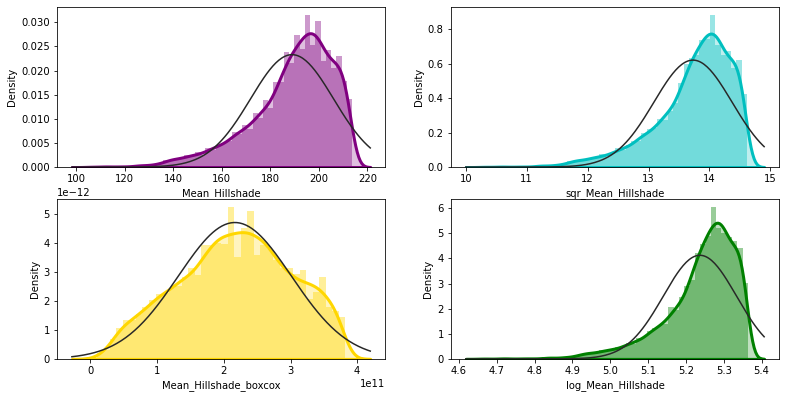

In [101]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Mean_Hillshade'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Mean_Hillshade'], 'green')
f.add_subplot(334)
histPlot(data_train['Mean_Hillshade_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Mean_Hillshade'], 'c')

The distribution did not improve with Square Root and Logarithms Transformation. Hence we use BoxCox which improved the distribution substantially. 

In [171]:
data_train.drop(['log10Mean_Hillshade','log_Mean_Hillshade','sqr_Mean_Hillshade'], axis=1,inplace=True)

### <font color=green> 5.2.6.2 Hillshade 9am <font>
#### <font color=green> Transformation  <font>

In [102]:
print('\033[95m'+"Skew before transformation\n", data_train['Hillshade_9am'].skew(), 
      "\nmin\n", data_train['Hillshade_9am'].min(),
      "\nmax\n", data_train['Hillshade_9am'].max(),)

Skew before transformation
 -1.0936805605383073 
min
 0 
max
 254


#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [103]:
data_train['log_Hillshade_9am'] = np.log(data_train['Hillshade_9am']+1)

In [104]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Hillshade_9am'].skew(), 
      "\nmin\n", data_train['log_Hillshade_9am'].min(),
      "\nmax\n", data_train['log_Hillshade_9am'].max(),)

Skew after log transformation
 -3.708953816677303 
min
 0.0 
max
 5.541263545158426


In [105]:
data_train['sqr_Hillshade_9am'] = data_train['Hillshade_9am']**0.5

In [106]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Hillshade_9am'].skew(), 
      "\nmin\n", data_train['sqr_Hillshade_9am'].min(),
      "\nmax\n", data_train['sqr_Hillshade_9am'].max(),)

Skew after Square Root transformation
 -1.4741589700243982 
min
 0.0 
max
 15.937377450509228


In [107]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers, transform training data with Boxcox
data_train['Hillshade_9am_boxcox'], lam  = stats.boxcox(data_train['Hillshade_9am']+1)
#lam is the best lambda for the distribution

In [108]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Hillshade_9am_boxcox'].skew(), 
      "\nmin\n", data_train['Hillshade_9am_boxcox'].min(),
      "\nmax\n", data_train['Hillshade_9am_boxcox'].max(),)

Skew after Boxcox transformation
 -0.1964508631897843 
min
 0.0 
max
 147303558.7348688


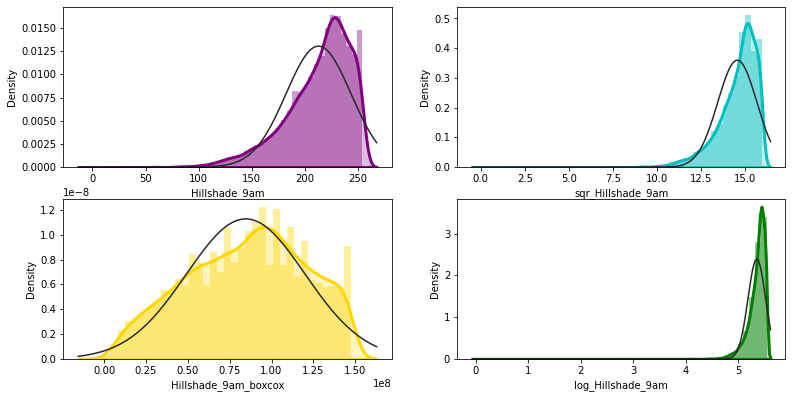

In [109]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Hillshade_9am'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Hillshade_9am'], 'green')
f.add_subplot(334)
histPlot(data_train['Hillshade_9am_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Hillshade_9am'], 'c')

BoxCox outperforms the other two for the Hillshade 9am 

In [170]:
data_train.drop(['log_Hillshade_9am','sqr_Hillshade_9am'], axis=1,inplace=True)

### <font color=green> 5.2.6.3 Hillshade Noon <font>
#### <font color=green> Transformation  <font>

In [110]:
print('\033[95m'+"Skew before transformation\n", data_train['Hillshade_Noon'].skew(), 
      "\nmin\n", data_train['Hillshade_Noon'].min(),
      "\nmax\n", data_train['Hillshade_Noon'].max(),)

Skew before transformation
 -0.9532317074981783 
min
 99 
max
 254


#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [111]:
data_train['log_Hillshade_Noon'] = np.log(data_train['Hillshade_Noon']+1)

In [112]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Hillshade_Noon'].skew(), 
      "\nmin\n", data_train['log_Hillshade_Noon'].min(),
      "\nmax\n", data_train['log_Hillshade_Noon'].max(),)

Skew after log transformation
 -1.4151877543194478 
min
 4.605170185988092 
max
 5.541263545158426


In [113]:
data_train['sqr_Hillshade_Noon'] = data_train['Hillshade_Noon']**0.5

In [114]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Hillshade_Noon'].skew(), 
      "\nmin\n", data_train['sqr_Hillshade_Noon'].min(),
      "\nmax\n", data_train['sqr_Hillshade_Noon'].max(),)

Skew after Square Root transformation
 -1.1654338788107177 
min
 9.9498743710662 
max
 15.937377450509228


In [115]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers, transform training data with Boxcox
data_train['Hillshade_Noon_boxcox'], lam  = stats.boxcox(data_train['Hillshade_Noon'])
#lam is the best lambda for the distribution

In [116]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Hillshade_Noon_boxcox'].skew(), 
      "\nmin\n", data_train['Hillshade_Noon_boxcox'].min(),
      "\nmax\n", data_train['Hillshade_Noon_boxcox'].max(),)

Skew after Boxcox transformation
 -0.10142061186267355 
min
 23334179.80223645 
max
 1004797392.9966723


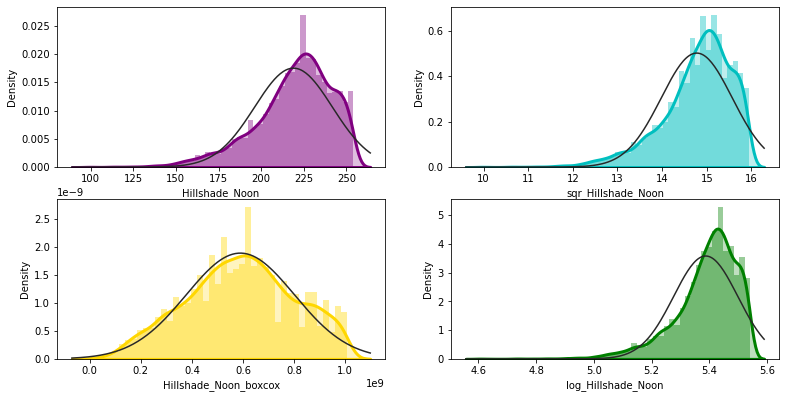

In [117]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Hillshade_Noon'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Hillshade_Noon'], 'green')
f.add_subplot(334)
histPlot(data_train['Hillshade_Noon_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Hillshade_Noon'], 'c')

Box Coc is outperforming the other transformations for Hillshade Noon

In [169]:
data_train.drop(['log_Hillshade_Noon','sqr_Hillshade_Noon'], axis=1,inplace=True)

### <font color=green> 5.2.6.4 Hillshade 3pm <font>
#### <font color=green> Transformation  <font>

In [118]:
print('\033[95m'+"Skew before transformation\n", data_train['Hillshade_3pm'].skew(), 
      "\nmin\n", data_train['Hillshade_3pm'].min(),
      "\nmax\n", data_train['Hillshade_3pm'].max(),)

Skew before transformation
 -0.34082723258478564 
min
 0 
max
 248


#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [119]:
data_train['log_Hillshade_3pm'] = np.log(data_train['Hillshade_3pm']+1)

In [120]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Hillshade_3pm'].skew(), 
      "\nmin\n", data_train['log_Hillshade_3pm'].min(),
      "\nmax\n", data_train['log_Hillshade_3pm'].max(),)

Skew after log transformation
 -4.40025450334946 
min
 0.0 
max
 5.517452896464707


In [121]:
data_train['sqr_Hillshade_3pm'] = data_train['Hillshade_3pm']**0.5

In [122]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Hillshade_3pm'].skew(), 
      "\nmin\n", data_train['sqr_Hillshade_3pm'].min(),
      "\nmax\n", data_train['sqr_Hillshade_3pm'].max(),)

Skew after Square Root transformation
 -1.338669485611021 
min
 0.0 
max
 15.748015748023622


In [123]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers, transform training data with Boxcox
data_train['Hillshade_3pm_boxcox'], lam  = stats.boxcox(data_train['Hillshade_3pm']+1)
#lam is the best lambda for the distribution

In [124]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Hillshade_3pm_boxcox'].skew(), 
      "\nmin\n", data_train['Hillshade_3pm_boxcox'].min(),
      "\nmax\n", data_train['Hillshade_3pm_boxcox'].max(),)

Skew after Boxcox transformation
 -0.15018383894899204 
min
 0.0 
max
 552.0141106428457


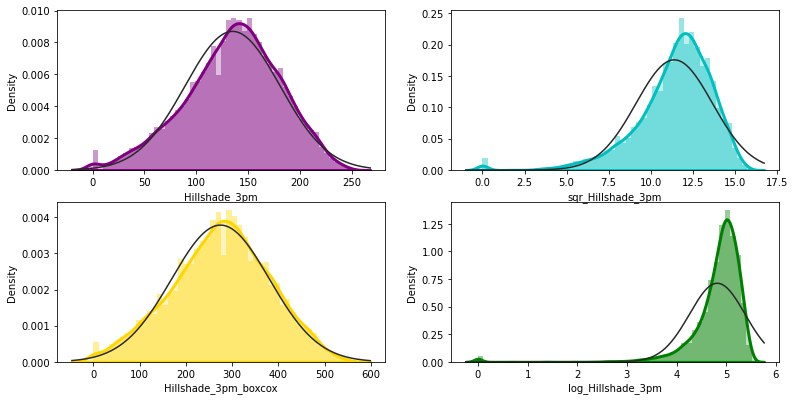

In [125]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Hillshade_3pm'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Hillshade_3pm'], 'green')
f.add_subplot(334)
histPlot(data_train['Hillshade_3pm_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Hillshade_3pm'], 'c')

For the Hillshade 3pm the data was not highly skwed, we either keep the original or we can use boxcox as it improved the variables as well. 

In [167]:
data_train.drop(['log_Hillshade_3pm','sqr_Hillshade_3pm'], axis=1,inplace=True)

### <font color=green> 5.2.7.1 Aspect <font>
#### <font color=green> Transformation  <font>

In [126]:
print('\033[95m'+"Skew before transformation\n", data_train['Aspect'].skew(), 
      "\nmin\n", data_train['Aspect'].min(),
      "\nmax\n", data_train['Aspect'].max(),)

Skew before transformation
 0.4509352940316223 
min
 0 
max
 360


#### <font color=green> Results after logarithm Transformation <font color=darkcyan>and Square root Transformation<font>

In [127]:
data_train['sqr_Aspect'] = data_train['Aspect']**0.5

In [128]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Aspect'].skew(), 
      "\nmin\n", data_train['sqr_Aspect'].min(),
      "\nmax\n", data_train['sqr_Aspect'].max(),)

Skew after Square Root transformation
 -0.12653305947211343 
min
 0.0 
max
 18.973665961010276


In [129]:
data_train['log_Aspect'] = np.log(data_train['Aspect']+1)

In [130]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Aspect'].skew(), 
      "\nmin\n", data_train['log_Aspect'].min(),
      "\nmax\n", data_train['log_Aspect'].max(),)

Skew after log transformation
 -1.4584406899303897 
min
 0.0 
max
 5.8888779583328805


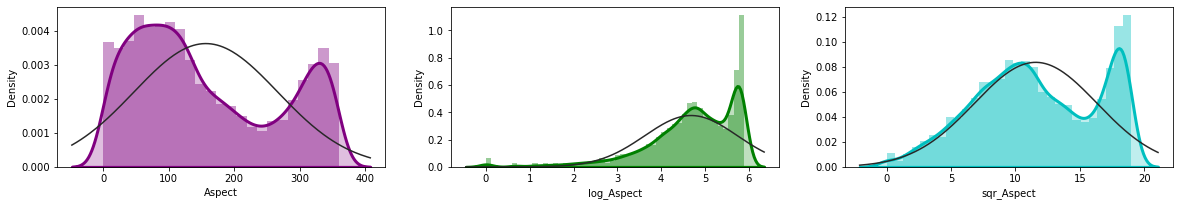

In [131]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Aspect'], 'purple')
f.add_subplot(332)
histPlot(data_train['log_Aspect'], 'green')
#f.add_subplot(334)
#histPlot(data_train['Hillshade_3pm_boxcox'], 'gold')                    
f.add_subplot(333)
histPlot(data_train['sqr_Aspect'], 'c')

For aspect square root turned out to be the best transformation in terms of skweness. 

In [176]:
data_train.drop(['log_Aspect'], axis=1,inplace=True)

### <font color=green> 5.2.6.4 Hillshades  Ratios <font>

In [132]:
data_train['ratio_Hillshade_3pm'] = data_train['Hillshade_3pm']/255
data_train['ratio_Hillshade_Noon'] = data_train['Hillshade_Noon']/255
data_train['ratio_Hillshade_9am'] = data_train['Hillshade_9am']/255

### <font color=green> 5.2.7.2 Aspect in degrees <font>
#### <font color=green> New Features  <font>
The azimuth is the angular direction of the sun, measured from north clockwise in degrees from 0 to 360. An Azimuth of 90 degrees is east.The Cut of values will be between for instance the middle of north and east.

* Aspect_North: from 315 deg to 45 deg
* Aspect_East: from 45 deg to 135 deg
* Aspect_South: from 135 deg to 225 deg
* Aspect_West: from 225 deg to 315 deg    

<img src="angle_azimuth.png" width=400 height=200 align="center">
    
Source:https://www.pveducation.org/pvcdrom/properties-of-sunlight/azimuth-angle

In [133]:
#Grouping Aspect in the four directions
data_train['Aspect_North']=  np.where(((data_train['Aspect']>=0) & (data_train['Aspect']<45))|((X_train['Aspect']>=315) & (X_train['Aspect']<=360)), 1 ,0)
data_train['Aspect_East']= np.where((data_train['Aspect']>=45) & (data_train['Aspect']<135), 1 ,0)
data_train['Aspect_South']= np.where((data_train['Aspect']>=135) & (data_train['Aspect']<225), 1 ,0)
data_train['Aspect_West']= np.where((data_train['Aspect']>=225) & (data_train['Aspect']<315), 1 ,0)

### <font color=green> 5.2.8 Elevation <font>

In [134]:
#No transformation as it is already very symetric distributed 
print('\033[95m'+"Skew before transformation\n", data_train['Elevation'].skew(), 
      "\nmin\n", data_train['Elevation'].min(),
      "\nmax\n", data_train['Elevation'].max(),)

Skew before transformation
 0.07563970693591461 
min
 1863 
max
 3849


In [135]:
#!pip install htmltabletomd

In [136]:
import htmltabletomd

### <font color=green> 5.2.9 Geoclimate grouping  <font>

#### <font color=green> 5.2.9.1 Climatic feature engineering to group soils  <font>

From original database donated by John A. Blackard

Code Designations:

Wilderness Areas:  	<br>

1 - Rawah Wilderness Area <br>
2 - Neota Wilderness Area  <br>
3 - Comanche Peak Wilderness Area<br>
4 - Cache la Poudre Wilderness Area<br>

Soil Types:             1 to 40 : based on the USFS Ecological
                        Landtype Units (ELUs) for this study area:<br>

  Study Code USFS ELU Code			Description<br>
	 1	   2702		Cathedral family - Rock outcrop complex, extremely stony.<br>
	 2	   2703		Vanet - Ratake families complex, very stony.<br>
	 3	   2704		Haploborolis - Rock outcrop complex, rubbly.<br>
	 4	   2705		Ratake family - Rock outcrop complex, rubbly.<br>
	 5	   2706		Vanet family - Rock outcrop complex complex, rubbly.<br>
	 6	   2717		Vanet - Wetmore families - Rock outcrop complex, stony.<br>
	 7	   3501		Gothic family.<br>
	 8	   3502		Supervisor - Limber families complex.<br>
	 9	   4201		Troutville family, very stony.<br>
	10	   4703		Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
	11	   4704		Bullwark - Catamount families - Rock land complex, rubbly.<br>
	12	   4744		Legault family - Rock land complex, stony.<br>
	13	   4758		Catamount family - Rock land - Bullwark family complex, rubbly.<br>
	14	   5101		Pachic Argiborolis - Aquolis complex.<br>
	15	   5151		unspecified in the USFS Soil and ELU Survey.<br>
	16	   6101		Cryaquolis - Cryoborolis complex.<br>
	17	   6102		Gateview family - Cryaquolis complex.<br>
	18	   6731		Rogert family, very stony.<br>
	19	   7101		Typic Cryaquolis - Borohemists complex.<br>
	20	   7102		Typic Cryaquepts - Typic Cryaquolls complex.<br>
	21	   7103		Typic Cryaquolls - Leighcan family, till substratum complex.<br>
	22	   7201		Leighcan family, till substratum, extremely bouldery.<br>
	23	   7202		Leighcan family, till substratum - Typic Cryaquolls complex.<br>
	24	   7700		Leighcan family, extremely stony.<br>
	25	   7701		Leighcan family, warm, extremely stony.<br>
	26	   7702		Granile - Catamount families complex, very stony.<br>
	27	   7709		Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
	28	   7710		Leighcan family - Rock outcrop complex, extremely stony.<br>
	29	   7745		Como - Legault families complex, extremely stony.<br>
	30	   7746		Como family - Rock land - Legault family complex, extremely stony.<br>
	31	   7755		Leighcan - Catamount families complex, extremely stony.<br>
	32	   7756		Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
	33	   7757		Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>
	34	   7790		Cryorthents - Rock land complex, extremely stony.<br>
	35	   8703		Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>
	36	   8707		Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>
	37	   8708		Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
	38	   8771		Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
	39	   8772		Moran family - Cryorthents - Leighcan family complex, extremely <br>stony.
	40	   8776		Moran family - Cryorthents - Rock land complex, extremely stony.<br>

        Note:   First digit:  climatic zone       Second digit:  geologic zones
                1.  lower montane dry             1.  alluvium
                2.  lower montane                 2.  glacial
                3.  montane dry                   3.  shale
                4.  montane                       4.  sandstone
                5.  montane dry and montane       5.  mixed sedimentary
                6.  montane and subalpine         6.unspecified in the USFS ELU Survey
                7.  subalpine                     7.  igneous and metamorphic
                8.  alpine                        8.  volcanic

The USFD, an American federal agency for forest service dependent on the department of agriculture has classified soil types according to __climatic zone (first digit)__ and __geology (second digit)__. Because of this, we believe a similar classification can be artificially engineered grouping all similar soils in 7 categories for climate (there is no lower montane dry soils) and 4 for geology (we do not take into consideration shale, sandstone, volcanic or unspecified)

#### <font color=green> 5.2.9.2 Climatic Zone feature engineering to group soils  <font>

In [137]:
data_train["Lower_Montane_Climate"] = data_train.loc[:,data_train.columns.str.contains("^Soil_Type[23456]$")].max(axis=1)

In [138]:
data_train['Montane_Dry_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[78]$")].max(axis=1)

In [139]:
data_train['Montane_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][0123]$|Soil_Type[9]$")].max(axis=1)

In [140]:
data_train['Montane_Dry_and_Montane_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][45]$")].max(axis=1)

In [141]:
data_train['Montante_and_Subalpine_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][678]$")].max(axis=1)


In [142]:
data_train['Subalpine_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type19$|^Soil_Type[2][0-9]$|^Soil_Type[3][0-4]$")].max(axis=1)


In [143]:
data_train['Alpine_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[3][56789]$|Soil_Type40")].max(axis=1)

#### <font color=green> 5.2.9.2 Geological feature engineering to group soils  <font>

The USFD, an American federal agency for forest service dependent on the department of agriculture has classified soil types according to climatic zone (first digit) and geology (second digit). Because of this, we believe a similar classification can be artificially engineered grouping all similar soils in 7 categories for climate (there is no lower montane dry soils) and 4 for geology (we do not take into consideration shale, sandstone, volcanic or unspecified because there are not existing in the dataset).

        Note:   First digit:  climatic zone             Second digit:  geologic zones
                1.  lower montane dry                   1.  alluvium
                2.  lower montane                       2.  glacial
                3.  montane dry                         3.  shale
                4.  montane                             4.  sandstone
                5.  montane dry and montane             5.  mixed sedimentary
                6.  montane and subalpine               6.  unspecified in the USFS ELU Survey
                7.  subalpine                           7.  igneous and metamorphic
                8.  alpine                              8.  volcanic

In [145]:
data_train['Alluvium_Soil'] = data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][45679]$|^Soil_Type[2][01]$")].max(axis=1)

In [146]:
data_train['Glacial_Soil'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[9]$|^Soil_Type[2][23]$")].max(axis=1)

In [147]:
data_train['Mixed_Sedimentary_Soil'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[7-8]$")].max(axis=1)

In [148]:
data_train['Igneus_and_Metamorphic_Soil'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1-6]$|^Soil_Type[1][01238]$|^Soil_Type[3-4]\d$|^Soil_Type[2][4-9]$")].max(axis=1)

In [149]:
data_train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Montane_Dry_Climate  \
0            221             232            148  ...                    0   
1            220             235            151  ...                    0   
2            234             238            135  ...                    0   
3            238             238            122  ...                    0   
4            220             234            150  ...                    0   

   Montane_Climate  Montane_Dry_and_Montane_Climate  \
0                0                                0   
1                0                                0   
2                1                                0   
3                0                                0   
4                0                                0   

   Montante_and_Subalpine_Climate  Subalpine_Climate  Alpine_Climate  \
0                               0                  1               0   
1                               0                  1               0   
2                               0                  0               0   
3                               0                  1               0   
4                               0                  1               0   

   Alluvium_Soil  Glacial_Soil  Mixed_Sedimentary_Soil  \
0              0             0                       0   
1              0             0                       0   
2              0             0                       0   
3              0             0                       0   
4              0             0                       0   

   Igneus_and_Metamorphic_Soil  
0                            1  
1                            1  
2                            1  
3                            1  
4                            1  

[5 rows x 101 columns]

Based on the medium paper "Preprocessing: Why you should generate polynominal features first before standardizing" mention it is not good practice to standardize the variablesbefore before PolynominalFeatures. This should be done after to not loss the signal of the variables.  

In [151]:
# Identify and drop our target variable 'Cover_Type' from dataframe, isolating our independent variables
X = data_train.drop('Cover_Type', axis = 1)

# Isolate our dependent variable as a feature
y = data_train['Cover_Type']

In [152]:
# Train Test Split (70/30 size), drop duplicates and missing values

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .3, random_state = 33, stratify=y)

X_train.drop_duplicates(inplace = True)
X_train.dropna(inplace = True)

### Soil Type Groupings

### Advanced Factorization

The numerical values present a level of detail that may be much more fine-grained than we need. For instance, the soil level can be represented by different categories (soil family, complex or stony/rubberly). We aggregate the data up which can help to avoid overfitting when the data is more aggregate: 

### <font color=green> 5.6 Soil Type Family  <font>

Using Discretization to bin the soil variable to the family type.<br>

__Cathedral__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>

__Ratake__ <br>
2 Vanet - Ratake families complex, very stony.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>

__Vanet__<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>

__Wetmore__<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>

__Gothic__<br>
7 Gothic family.<br>
                    
__Limber__ <br>
8 Supervisor - Limber families complex. <br>

__Troutville__<br>
9 Troutville family, very stony.<br>

__Legault__<br>
12 Legault family - Rock land complex, stony.<br>
29 Como - Legault families complex, extremely stony.<br>

__Gateview__ <br>
17 Gateview family - Cryaquolis complex.<br>

__Rogert__<br>
18 Rogert family, very stony.<br>


__Como__<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>

__Bross__<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>



__Catamount__<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>
26 Granile - Catamount families complex, very stony.<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>

__Leighcan__<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>

__Moran__<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Others__<br> 
3 Haploborolis - Rock outcrop complex, rubbly.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
14 Pachic Argiborolis - Aquolis complex.<br>
16 Cryaquolis - Cryoborolis complex.<br>
19 Typic Cryaquolis - Borohemists complex.<br>

In [153]:
# Soil Type
family_soil_types = {
    'Family_Cathedral': ['Soil_Type1'],
    'Family_Retake': ['Soil_Type2', 'Soil_Type4'],
    'Family_Vanet': ['Soil_Type5'],
    'Family_Wetmore': ['Soil_Type6'],
    'Family_Gothic': ['Soil_Type7'],
    'Family_Limber': ['Soil_Type8'],
    'Family_Troutville_': ['Soil_Type9'],
    'Family_Legault': ['Soil_Type12', 'Soil_Type29'],
    'Family_Gateview': ['Soil_Type17'],
    'Family_Rogert': ['Soil_Type18'],
    'Family_Como': ['Soil_Type30'],
    'Family_Bross': ['Soil_Type36'],
    'Family_Catamount': ['Soil_Type10','Soil_Type11','Soil_Type13','Soil_Type26','Soil_Type32','Soil_Type31','Soil_Type33'],
    'Family_Leighcan': ['Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type27','Soil_Type28'],
    'Family_Moran': ['Soil_Type38','Soil_Type39','Soil_Type40'],
    'Family_Others': ['Soil_Type3','Soil_Type15','Soil_Type37','Soil_Type34','Soil_Type35','Soil_Type20','Soil_Type14','Soil_Type16','Soil_Type19'],
} 

for family in family_soil_types:
    data_train[family] = 0
    soil_types = family_soil_types[family]
    for soil_type in soil_types:
        data_train[family] += data_train[soil_type]

data_train

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Family_Troutville_  \
0                221             232            148  ...                   0   
1                220             235            151  ...                   0   
2                234             238            135  ...                   0   
3                238             238            122  ...                   0   
4                220             234            150  ...                   0   
...              ...             ...            ...  ...                 ...   
15115            170             251            214  ...                   0   
15116            249             221             91  ...                   0   
15117            250             220             83  ...                   0   
15118            229             237            119  ...                   0   
15119            189             244            164  ...                   0   

       Family_Legault  Family_Gateview  Family_Rogert  Family_Como  \
0                   1                0              0            0   
1                   1                0              0            0   
2                   1                0              0            0   
3                   0                0              0            1   
4                   1                0              0            0   
...               ...              ...            ...          ...   
15115               0                0              0            0   
15116               0                0              0            0   
15117               0                0              0            0   
15118               0                0              0            0   
15119               0                0              0            0   

       Family_Bross  Family_Catamount  Family_Leighcan  Family_Moran  \
0                 0                 0                0             0   
1                 0                 0                0             0   
2                 0                 0                0             0   
3                 0                 0                0             0   
4                 0                 0         

### <font color=green> 5.6 Soil Type Complex  <font>

We will group the soil types according to their family and according to the complex and stonyness

Complex Group <br>
__Rock_outcrop_complex__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>
2 Vanet - Ratake families complex, very stony.<br>
3 Haploborolis - Rock outcrop complex, rubbly.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>

__Ratake_families_complex__<br>
2 Vanet - Ratake families complex, very stony.<br>


__Limber families complex__<br>
8 Supervisor - Limber families complex.<br>

__rock land complex__<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
12 Legault family - Rock land complex, stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Cryoborolis complex__<br>
16 Cryaquolis - Cryoborolis complex.<br>
17 Gateview family - Cryaquolis complex.<br>

__Bullwark family complex__<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>

__Aquolis complex__<br>
14 Pachic Argiborolis - Aquolis complex.<br>

__Borohemists complex__<br>
19 Typic Cryaquolis - Borohemists complex.<br>

__Cryaquolls complex__<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>

__till substratum complex__<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>

__Catamount families complex__<br>
26 Granile - Catamount families complex, very stony.<br>
1 Leighcan - Catamount families complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>

__Legault families complex__<br>
29 Como - Legault families complex, extremely stony.<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>

__Leighcan family complex__<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>

__Cryaquepts complex__<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>

__Cryumbrepts complex__<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>

__Cryorthents complex__<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>

__others__ <br>
7 Gothic family.<br>
9 Troutville family, very stony.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
18 Rogert family, very stony.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>


Source: https://www.kaggle.com/competitions/forest-cover-type-prediction/data

### <font color=green> 5.6 Soil Type Stonyness <font>

In [154]:
# Complex Type
family_complex_types = {
    'Rock_outcrop_complex': ['Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type10','Soil_Type27','Soil_Type28','Soil_Type33'],
    'Ratake_families_complex': ['Soil_Type2'],
    'Limber_families_complex': ['Soil_Type8'],
    'Rock_land_complex': ['Soil_Type11','Soil_Type12','Soil_Type34','Soil_Type40'],
    'Cryoborolis_complex': ['Soil_Type16','Soil_Type17'],
    'Bullwark_family_complex': ['Soil_Type13'],
    'Aquolis_complex_': ['Soil_Type14'],
    'Borohemists_complex': ['Soil_Type19'],
    'Cryaquolls_complex': ['Soil_Type20','Soil_Type23','Soil_Type38'],
    'Till_substratum_complex': ['Soil_Type21'],
    'Catamount_families_complex': ['Soil_Type26','Soil_Type1','Soil_Type31'],
    'Legault_families_complex': ['Soil_Type39','Soil_Type30'],
    'Leighcan_family_complex': ['Soil_Type32','Soil_Type39'],
    'Cryaquepts_complex': ['Soil_Type35'],
    'Cryumbrepts_complex': ['Soil_Type36'],
    'Cryorthents_complex': ['Soil_Type37'],
    'others_complex': ['Soil_Type7','Soil_Type9','Soil_Type22','Soil_Type24','Soil_Type25','Soil_Type18','Soil_Type15'],
} 

for family in family_complex_types:
    data_train[family] = 0
    complex_types = family_complex_types[family]
    for complex_type in complex_types:
        data_train[family] += data_train[complex_type]

data_train

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Borohemists_complex  \
0                221             232            148  ...                    0   
1                220             235            151  ...                    0   
2                234             238            135  ...                    0   
3                238             238            122  ...                    0   
4                220             234            150  ...                    0   
...              ...             ...            ...  ...                  ...   
15115            170             251            214  ...                    0   
15116            249             221             91  ...                    0   
15117            250             220             83  ...                    0   
15118            229             237            119  ...                    0   
15119            189             244            164  ...                    0   

       Cryaquolls_complex  Till_substratum_complex  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
15115                   0                        0   
15116                   0                        0   
15117                   0                        0   
15118                   0                        0   
15119                   0                        0   

       Catamount_families_complex  Legault_families_complex  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         1   
4                               0                         0   
...                           ...                       ...   
15115                           0                         0   
15116                           0                         0   
15117              

__Stony__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>
2 Vanet - Ratake families complex, very stony.<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>
9 Troutville family, very stony.<br>
12 Legault family - Rock land complex, stony.<br>
18 Rogert family, very stony.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
26 Granile - Catamount families complex, very stony.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>
29 Como - Legault families complex, extremely stony.<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Rubbly__<br>
3 Haploborolis - Rock outcrop complex, rubbly.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>

__others__<br>
7 Gothic family.<br>
8 Supervisor - Limber families complex.<br>
14 Pachic Argiborolis - Aquolis complex.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>
16 Cryaquolis - Cryoborolis complex.<br>
17 Gateview family - Cryaquolis complex.<br>
19 Typic Cryaquolis - Borohemists complex.<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>

In [155]:
# Soil Type
family_types = {
    'Type_Stony': ['Soil_Type1','Soil_Type2', 'Soil_Type6', 'Soil_Type9', 'Soil_Type12', 'Soil_Type18', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
    'Type_Rubbly': ['Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type10', 'Soil_Type11', 'Soil_Type13'],
    'Type_Other': ['Soil_Type7','Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type35']
} 

for family in family_types:
    data_train[family] = 0
    soil_types = family_types[family]
    for soil_type in soil_types:
        data_train[family] += data_train[soil_type]

data_train

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  \
0                221             232            148  ...   
1                220             235            151  ...   
2                234             238            135  ...   
3                238             238            122  ...   
4                220             234            150  ...   
...              ...             ...            ...  ...   
15115            170             251            214  ...   
15116            249             221             91  ...   
15117            250             220             83  ...   
15118            229             237            119  ...   
15119            189             244            164  ...   

       Catamount_families_complex  Legault_families_complex  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         1   
4                               0                         0   
...                           ...                       ...   
15115                           0                         0   
15116                           0                         0   
15117                           0                         0   
15118                           0                         0   
15119                           0                         0   

       Leighcan_family_complex  Cryaquepts_complex  Cryumbrepts_complex  \
0                            0                   0                    0   
1                            0                   0                    0   
2                            0                   0                    0   
3                            0                   0                    0   
4                            0                   0                    0   
...                        ...                 ...                  ...   
15115                        0                   0                    0   
15116                        0                   0                    0   
15117                        0                   0     

### <font color=green> 5.10 Summary <font>

<table>
  <tr>
    <th><b>Features</b></th>
    <th><b>Transformation</b></th>
  </tr>
  <tr>
<td>ID  </td>
    <td> Drop</td>
  </tr>
  <tr>
    <td>Distance To Hydrology  </td>
    <td><b><i>Square Root</i></b> of the length of the side of horizontal and vertical </td>
  </tr>
  <tr>
    <td>Horizontal Distance To Roadways</td>
    <td><b>Square Root</b> of horizontal Distance to Roadways</td>
  </tr>
  <tr>
    <td> Slope</td>
    <td><b><i>Square Root</i></b> Slope</td>
  </tr>
  <tr>
    <td> Horizontal_Distance To firepoints</td>
    <td><b><i>Square Root</i></b> Horizontal Distance to firepoints</td>
  </tr>
  <tr>
    <td>Mean Hillshade</td>
    <td><b><i>Box Cox Average</i></b> of all Hillshades features</td>
  <tr>      
  </tr>
    <td>Hillshade 9am</td>
    <td><b><i>Box Cox </i></b> Hillshade 9am</td>
  <tr>      
  </tr>
    <td>Hillshade Noon</td>
    <td><b><i>Box Cox </i></b> Hillshade Noon</td>
  <tr>      
  </tr>
    <td>Hillshade 3pm</td>
    <td><b><i>Box Cox</i></b> Hillshade 3pm</td>
  <tr>      
  </tr>
        <td>Aspect</td>
    <td><b><i>Square Root</i></b> Aspect</td>
  <tr>      
  </tr>
    <td>Aspect North, East,South and West</td>
    <td><b><i>Grouping</i></b> Aspect</td>
  <tr>      
  </tr>
    <td>Geological Grouping</td>
    <td><b><i>Grouping</i></b> Soil Types</td>
  <tr>      
  </tr>
    <td>Climate Grouping</td>
    <td><b><i>Grouping</i></b> Soil Types</td>
  <tr>      
  </tr>
     <td>Soil Family</td>
    <td><b><i>Grouping</i></b> Soil Families</td>
  <tr>      
  </tr>
     <td>Soil Type Complex</td>
    <td><b><i>Grouping</i></b> Soil Complex</td>
  <tr>      
  </tr> 
     <td>Soil Type Stonyness</td>
    <td><b><i>Grouping</i></b> by Soil stonyness</td>
  <tr>      
  </tr>     

</table>

# <font color=green> 6.Feature Selection <font>
    
    
## <font color=green> 6.1. Standardization <font>

Selecting the most useful features to train the model can improve the performance of our models. 

In [245]:
pd.set_option('display.max_columns', None)
data_train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1  

We split the dataset to train and validation set, in order to test our models. We use stratify to have a balanced datset. 

In [262]:
X = data_train.drop(['Cover_Type'], axis=1)
y = data_train['Cover_Type']
column_list = X.columns

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))

The shape of validation data:(3024, 121) and (3024,) 
The shape of training data:(12096, 121) and (12096,) 


For the standardization we need only numerical values, since these has been aleady encoded we use the names to filter out the dummy variables 

In [328]:
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [329]:
# only the dummy variables filtered 
scale_categorial

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Aspect_North',
 'Aspect_East',
 'Aspect_South',
 'Aspect_West',
 'Lower_Montane_Climate',
 'Montane_Dry_Climate',
 'Montane_Climate',
 'Montane_Dry_and_Montane_Climate',
 'Montante_and_Subalpine_Climate',
 'Subalpine_Climate',
 'Alpine_Climate',
 'Alluvium_Soil',
 'Glacial_Soil',
 '

In [330]:
#numerical_train = data_train.filter(items=scale_numerical)

In [331]:
#categorial_train = data_train.filter(items=scale_categorial)

In [332]:
from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [333]:
X_train[scale_numerical] = scaler.fit_transform(X_train[scale_numerical])
X_val[scale_numerical] = scaler.fit_transform(X_val[scale_numerical])

In [334]:
X_train

Id  Elevation    Aspect     Slope  \
14128  0.934515   0.543303  0.419444  0.519231   
4425   0.292697   0.506546  0.830556  0.173077   
909    0.060127   0.536254  0.816667  0.115385   
5123   0.338868   0.485398  0.400000  0.346154   
10901  0.721061   0.350453  0.933333  0.269231   
...         ...        ...       ...       ...   
5297   0.350377   0.232628  0.538889  0.500000   
12296  0.813335   0.137462  0.644444  0.500000   
8010   0.529832   0.769386  0.486111  0.192308   
7557   0.499868   0.650050  0.094444  0.230769   
11291  0.746858   0.356999  0.150000  0.384615   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
14128                          0.285281                        0.463811   
4425                           0.068285                        0.165436   
909                            0.163885                        0.212703   
5123                           0.091047                        0.217134   
10901                          0.022762                        0.199409   
...                                 ...                             ...   
5297                           0.068285                        0.279173   
12296                          0.072079                        0.258493   
8010                           0.764795                        0.406204   
7557                           0.113809                        0.187592   
11291                          0.064492                        0.171344   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
14128                         0.279826       0.952756        0.825806   
4425                          0.242380       0.771654        0.890323   
909                           0.736575       0.803150        0.903226   
5123                          0.327286       0.952756        0.870968   
10901                         0.291147       0.736220        0.780645   
...                                ...            ...             ...   
5297                          0.239768       0.811024        0.974194   
12296                         0.163135       0.665354        0.987097   
8010                          0.423657       0.889764        0.948387   
7557                          0.447605       0.858268        0.741935   
11291                         0.093033       0.893701        0.600000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
14128       0.387097                            0.119691                 0   
4425        0.729839                            0.208780                 0   
909         0.701613                            0.249392                 1   
5123        0.459677                            0.168883                 0   
10901       0.689516                            0.074932                 0   
...              ...                                 ...               ...   
5297        0.661290                            0.130702                 0   
12296       0.850806                            0.054626                 0   
8010        0.608871                            0.246389                 0   
7557        0.524194                            0.459030                 0   
11291       0.358871                            0.188760                 0   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  \
14128                 0                 1                 0           0   
4425                  0                 1                 0           0   
909                   0                 0                 0           0   
5123                  0                 1                 0           0   
10901                 0                 1                 0           0   
...                 ...               ...               ...         ...   
5297                  0                 0                 1           0   
12296                 0                 0                 1           1   
8010                  

## <font color=green> 6.2. Feature Importance <font>

We first fit a linear model to the initial dataset to have a baseline to evaluate the data cleaning and feature engineering impact.

To facilitate the training process, we will use the `sklearn` library <https://scikit-learn.org/stable/index.html> that provides a wrapper for the preprocessing, training, and evaluation of many machine learning algorithms. 

In [298]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

initial_lm_mod = linear_model.LogisticRegression(multi_class='multinomial',
    max_iter=1000, penalty='none'
)

baseline_acc = np.mean(
    cross_val_score(initial_lm_mod, X_train,y_train, cv=5)
)

print(f"Baseline model with Accuracy = {baseline_acc:.4}")

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Baseline model with Accuracy = 0.6529


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [288]:
def get_feature_importance(clf, feature_names):
    """
    Function to print the most important features of a logreg classifier
    based on the coefficient values
    """
    return pd.DataFrame(
        {
            'variable': feature_names, # Feature names
            'coefficient': clf.coef_[0] # Feature Coeficients
        }
    ) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

In [307]:
get_feature_importance(
    initial_lm_mod.fit(X_train,y_train), 
    X_train.columns.get_level_values(0).tolist()
)

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Feature importance allows you to understand the relationship between the features and the target variable. It also helps you understand what features are irrelevant for the model. <br>
* The Most important features are Elevation, Wilderness_Area1, Family_Moran

In [310]:
#Code from Jorge in Forum, select the best 20 features 
from sklearn.feature_selection import SelectKBest, chi2
selector=SelectKBest(chi2, k=20)
# Select the top most important features
X_new=selector.fit_transform(X_train, y_train)
# Get the indexes for columns selected
cols = selector.get_support(indices=True)
# Get  columns from original dataframe
X_train_new = X_train.iloc[:,cols]

In [312]:
X_train_new.columns

Index(['Aspect', 'Wilderness_Area1', 'Wilderness_Area4', 'Soil_Type3',
       'Soil_Type10', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Lower_Montane_Climate', 'Montane_Climate', 'Subalpine_Climate',
       'Alpine_Climate', 'Glacial_Soil', 'Family_Retake', 'Family_Legault',
       'Family_Leighcan', 'Family_Moran', 'Family_Others',
       'Rock_outcrop_complex', 'Type_Rubbly'],
      dtype='object')

## <font color=green> 6.3. Chi-squared Selection <font>

In [279]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


#Javier code forum, error 
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt 

listofaccs0 = []
listofvars0 =[]

#Your code here

for k1 in range (0, len(X_train.columns),1):
    listofvars0.append(k1)
    newX = SelectKBest(chi2, k=k1).fit_transform(X_train,y_train)
    
    chi_lm_mod = linear_model.LogisticRegression(multi_class='multinomial',
    max_iter=1000, penalty='none')
    baseline_acc = np.mean(cross_val_score(chi_lm_mod, newX,y_train,cv = 5))
    listofaccs0.append(round(baseline_acc,4))

plt.figure(figsize(20,15))


In [ ]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.feature_selection import SelectKBest, chi2

new_features = sklearn.feature.selection.SelectKBest(score_func = chi2, k=40).fit(X_train,y_train)
chi2_score = pd.DataFrame(list(zip(X_train.columns, new_features.scores_,new_features.pvalues_)), columns = ['feature','score','pvalue'])
chi2_score.sort_values('score', ascending = False)
chi2_score

In [316]:
#Carlos Code
coln=X_train.columns
accuracy=[]
Best_accuracy=[0,0]
baseline_acc_max=0
for kval in range(1,len(coln)):
    selector = SelectKBest(chi2, k=kval)
    trainK = selector.fit_transform(X_train, y_train)
    cols = selector.get_support(indices=True)
    X_train_newK = X_train.iloc[:,cols]
    X_train_newK
    initial_lm_mod = linear_model.LogisticRegression(multi_class='multinomial',
        max_iter=1000, penalty='none'
    )
    baseline_acc = np.mean(
        cross_val_score(initial_lm_mod, X_train_newK, y_train, cv=5)
    )
    accuracy.append({baseline_acc})
    if baseline_acc > baseline_acc_max:
        baseline_acc_max = baseline_acc
        Best_accuracy=[kval,baseline_acc_max]

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [317]:
Best_accuracy

[67, 0.6541823853173396]

## <font color=green> 6.4. Ridge Regularization <font>

We will start with Ridge (or L2) regularization.<br>
For this exercise, we are going to make use of the Ridge Model in sklearn https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification.

In [305]:
ridge_mod = linear_model.LogisticRegression(multi_class='multinomial', max_iter=10000,penalty='l2')
print("Accuracy = {:.4}".format(np.mean(cross_val_score(ridge_mod, X_train, y_train, cv=5))))

Accuracy = 0.6957


In [306]:
get_feature_importance(ridge_mod.fit(X_train,y_train), X_train.columns.get_level_values(0).tolist())

Similar performance w.r.t the un-regularized models. However, you can see how the feature coefficients are smaller than the original ones, due to the regularization.

Let's look at how the coefficient weights and accuracy scores change along with the different regularization values.
To that end, I have implemented the following piece of code. Do not be overwhelmed by it. It basically defines a list of regularization values to test and train a new Logistic Regression model for one of these regularization values. We keep track of the coefficient values and the accuracy of each of these models to plot them according to the defined regularization parameters.

In [318]:
# Define a basic Logisitic Regresion Model that applies L2 (Ridge) regularization
ridge_mod = linear_model.LogisticRegression(multi_class='multinomial',max_iter=10000,penalty='l2')

# Define a list of 100 regularization values to test (from 0.1 to 0.0001)
alphas = 10**np.linspace(-1,-4,100)

coefs_ = [] # Array to store the value of the coefficients for each model
scores_ = [] # Array to store the accuracy for each model

# Go over the regularization values list defined above, train a logreg model for each of the regularization values and evaluate it.
for a in alphas:
    ridge_mod.set_params(C=a) # Set the regularization parameter 
    scores_.append(np.mean(cross_val_score(ridge_mod, X_train, y_train, cv=5))) # Appends the accuracy of the model
    coefs_.append(ridge_mod.fit(X_train, y_train).coef_.ravel().copy()) # Appends the coefficient of the model

# Conver the coefficient and scores arrays to numpy arrays
coefs_ = np.array(coefs_)
scores_ = np.array(scores_)

# Define the figures to plot the values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Logistic Regression Path', fontsize=20)

# Coeff Weights Plot
ax1.plot(alphas, coefs_, marker='o')
ymin, ymax = plt.ylim()
ax1.set_ylabel('Coefficient Weights', fontsize = 15)
ax1.set_xlabel('Alpha', fontsize = 15)
ax1.axis('tight')

# Accuracy Plot
ax2.plot(alphas, scores_, marker='o')
ymin, ymax = plt.ylim()
ax2.set_ylabel('Accuracy Score', fontsize = 15)
ax2.set_xlabel('Alpha', fontsize = 15)
ax2.axis('tight')

plt.show()

KeyboardInterrupt: 

As you can see in the left figure, the smaller the alpha value (alpha), the larger the regularization and, consequently, the smaller the weights of the coefficients. This is because, if we check the sklearn documentation, we will see that this value is the: "Inverse of regularization strength."
When regularization is large enough (i.e., alpha is small), the values of the coefficients are close to 0 (i.e., null model).
As there is a trade-off between variance (i.e., less over-fitted model --> more regularization) and bias (i.e., learning more from the training set --> less regularization), You must find the optimal alpha value. As you can see in the right figure, this value is achieved with small alpha values (i.e., more regularization). This specific value is not always the same since it depends on your data and the prediction problem.
To automatize the process of finding the optimal value, you can make use of the LogisticRegressionCV function in sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) that performs CV, testing different hyperparameters (that you can provide) and selecting the optimal one.

## <font color=green> 6.5. Pearson correlation <font>

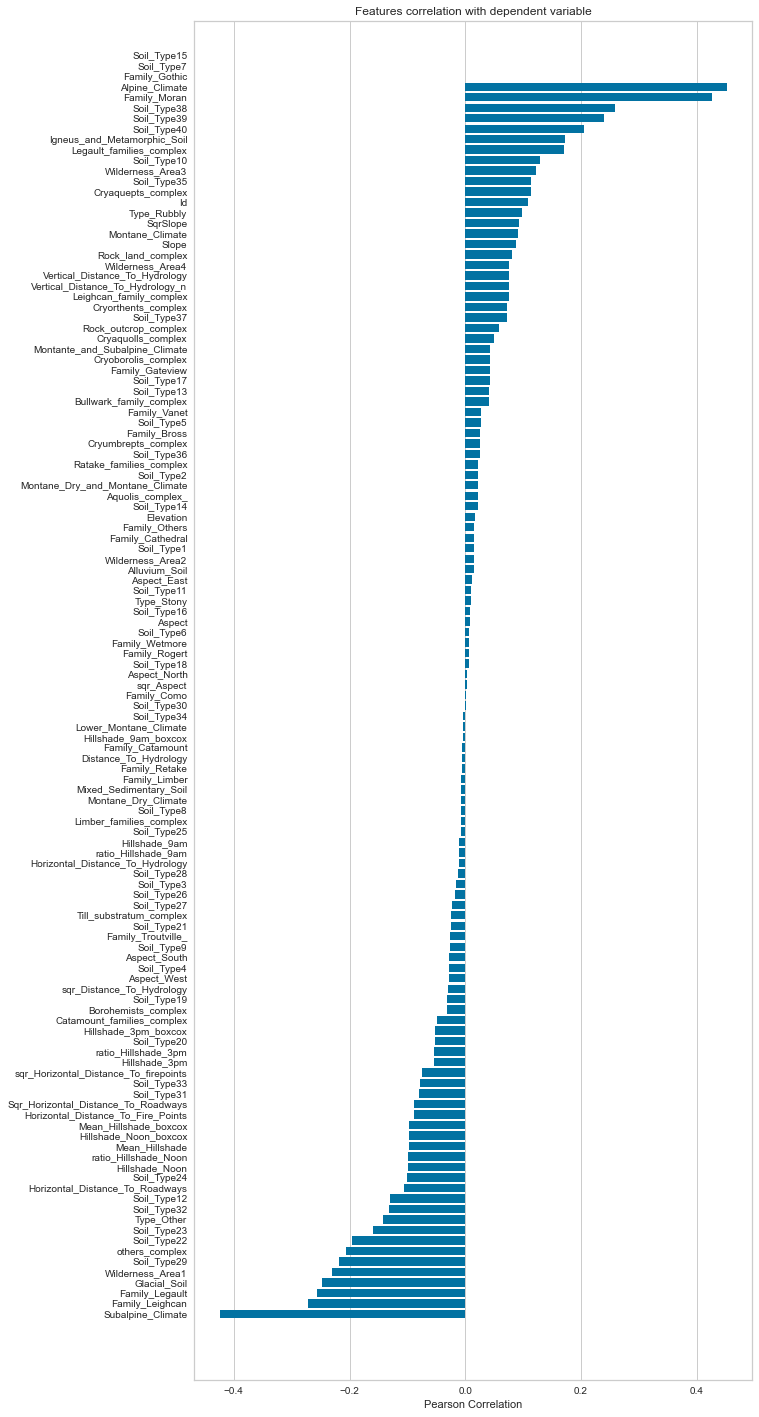

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [374]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

#X, y = data_train['data'], data_train['Cover_Type']

# Create a list of the feature names
#features = np.array(data['feature_names'])
fig, ax = plt.subplots(figsize=(10,25))         # Sample figsize in inches
# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=None,sort=True)

ax = visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [342]:
pd.set_option('display.max_columns', None)

In [345]:
corr = data_train.corrwith(data_train["Cover_Type"])
print(corr)

Id                                  0.108363
Elevation                           0.016090
Aspect                              0.008015
Slope                               0.087722
Horizontal_Distance_To_Hydrology   -0.010515
                                      ...   
Cryorthents_complex                 0.071210
others_complex                     -0.206854
Type_Stony                          0.009133
Type_Rubbly                         0.098225
Type_Other                         -0.141317
Length: 122, dtype: float64


In [ ]:
threshold=0.5
a=abs(corr)
result=a[a>threshold]
result=pd.DataFrame(data=a).reset_index()

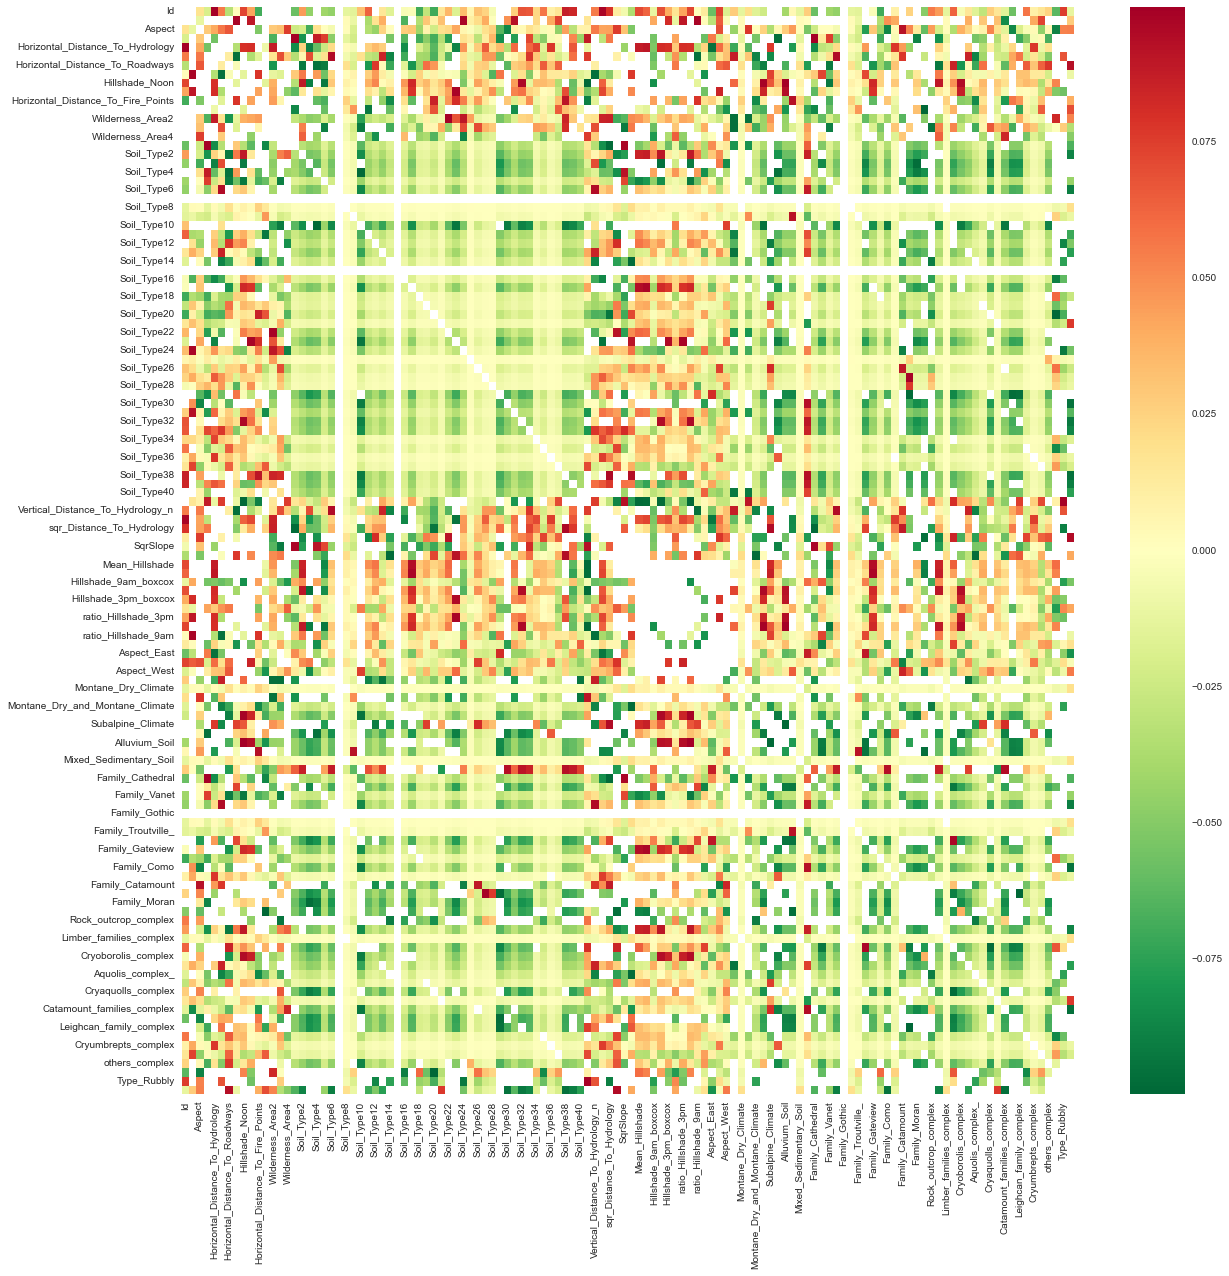

In [361]:
import numpy as np # Data manipulation  
import matplotlib.pyplot as plt 
import seaborn 
c = data_train.corr() 
plt.figure(figsize=(20,20)) 
seaborn.heatmap(c, cmap='RdYlGn_r', mask = (np.abs(c) >= 0.1)) 
plt.show()

In [364]:
X_y = data_train.copy()
X_y['Cover_Type'] = y

print(X_y)

          Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0            

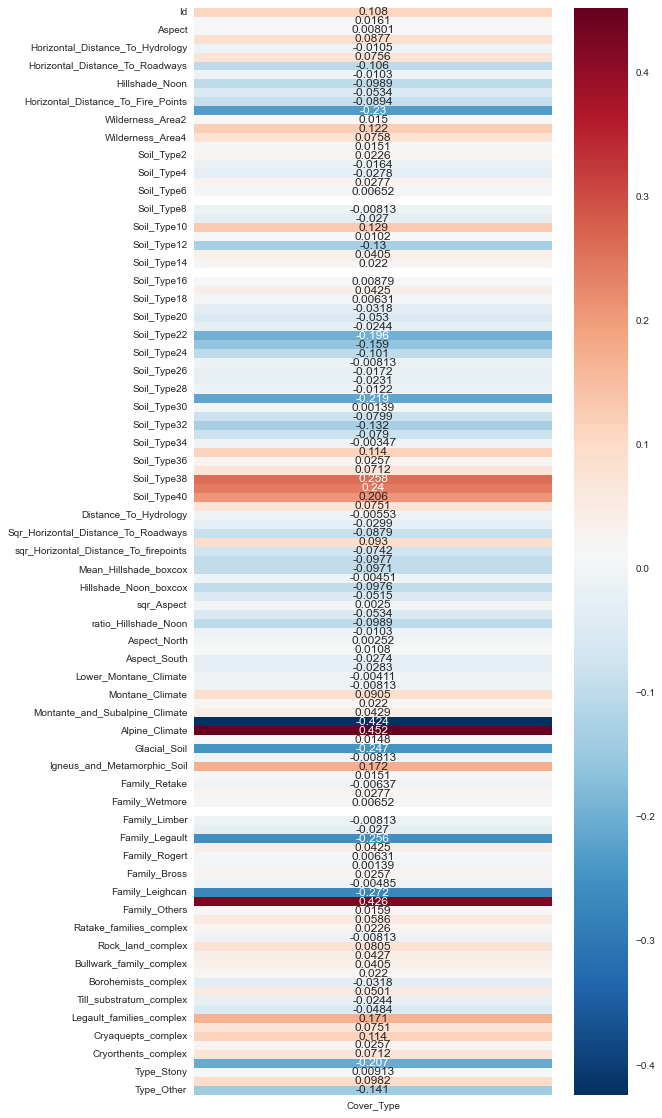

In [371]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,20))         # Sample figsize in inches

corr_matrix = X_y.corr()

# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['Cover_Type']].drop(labels=['Cover_Type'])

sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r',ax=ax)
plt.show()

## <font color=green> 6.6. PCA <font>

In [ ]:
https://www.codecademy.com/article/fe-filter-methods